# Dry Beans Classification With Supervised Learning


<center><img src="images/beans_report.png" style="height: 35em; width:auto;"/></center>

IART 2020/2021  - T4G4

Breno Accioly   - up201800170@edu.fe.up.pt

Ivo Saavedra    - up201707093@edu.fe.up.pt

Rodrigo Reis    - up201806534@edu.fe.up.pt

## Introduction

The main objective of this project was to create a classification model apllying multiple Supervised Learning algorithms to the given dataset.

On this notebook we report the necessary steps taken to process the input data as well as implemented algorithms and their parameters. We will also compare the classification models in order to determine which ones are the most appropriate for the problem at hand.

## Problem Description

The provided dataset contains seven target classes:
    - **Seker:** large and round seeds;
    - **Barbunya:** large seeds with an oval shape;
    - **Bombay:** very large seeds with oval shape;
    - **Cali:** large kidney shapped seeds;
    - **Horoz:** long, cylindrical and medium size;
    - **Sira:** small nad flat seeds;
    - **Dermason:** flat beans with round endings.
    
The features used to evaluate each bean are the following:
    - **Area (A):** Area of a bean zone and the number of pixels within its boundaries;
    - **Perimeter (P):** Bean circumference is defined as the length of its border;
    - **Major axis length (L):** Distance between the ends of the longest line that can be drawn from a bean;
    - **Minor axis length (l):** Longest line that can be drawn from the bean while standing perpendicular to the main axis.
    - **Aspect ratio (K):** Relationship between L and l.
    - **Eccentricity (Ec):** Eccentricity of the ellipse having the same moments as the region.
    - **Convex area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
    - **Equivalent diameter (Ed):** Diameter of a circle having the same area as a bean seed area.
    - **Extent (Ex):** Ratio of the pixels in the bounding box to the bean area.
    - **Solidity (S):** Ratio of the pixels in the convex shell to those found in beans (convexity).
    - **Roundness (R):** Calculated with the following formula: (4piA)/(P^2)
    - **Compactness (CO):** Measures the roundness of an object: Ed/L
    - **Shape Factor(1-4):** Shape features used to classify each bean


In [4]:
import math
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

beans_data = pd.read_excel('../resources/dataset.xlsx', na_values=['NA'], engine='openpyxl')

# null values verification
n = beans_data.isnull().sum().sum()
if n > 0:
    print(f'[!] {n} values are missing.')

# renaming 'roundness' collumn to be consistent with the other columns
beans_data.rename(columns = {'roundness' : 'Roundness'}, inplace=True)

#print("=== DESCRIBE ===")
print(beans_data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

[!] Saving solution for: SEKER


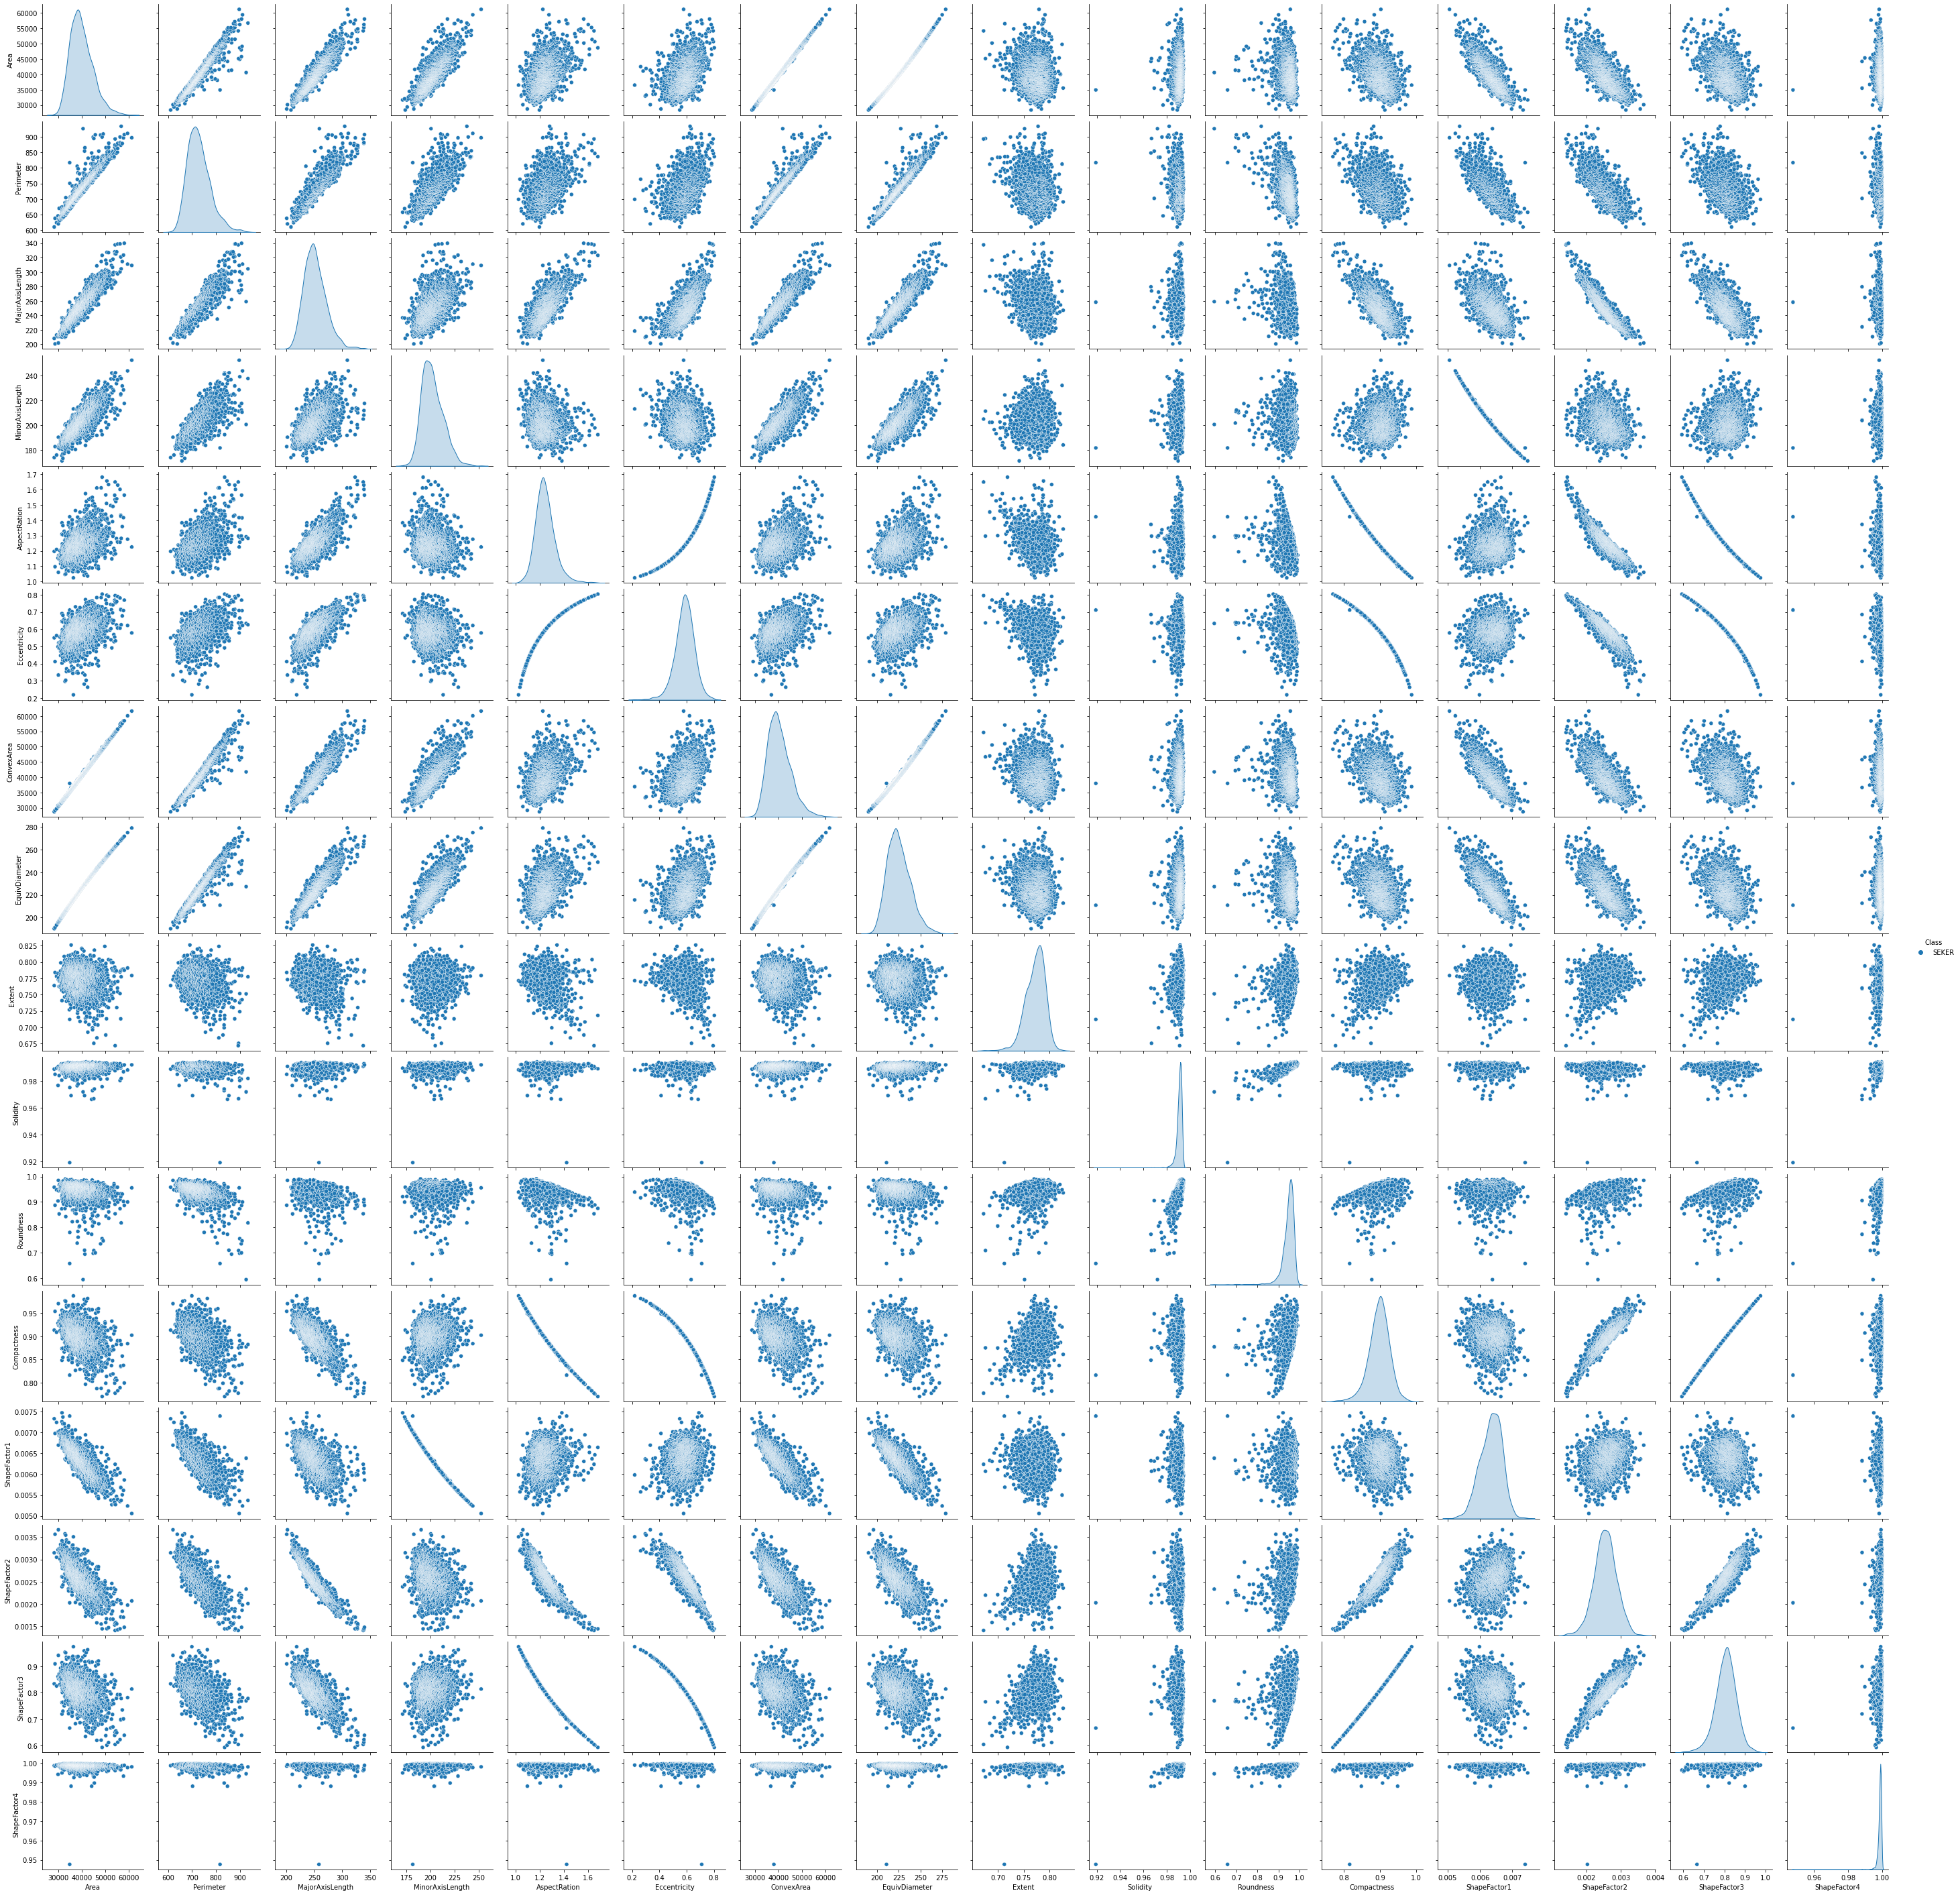

In [8]:
def plot_class_data(ds, class_name, out_file, out_dir='../output/'):
    data = ds.loc[ds['Class'] == f'{class_name}']
    print(f'[!] Saving solution for: {class_name}')
    sb.pairplot(data.dropna(), hue='Class')
    plt.savefig(f'{out_dir}{out_file}.png')
plot_class_data(beans_data, 'SEKER', 'seker_orig')

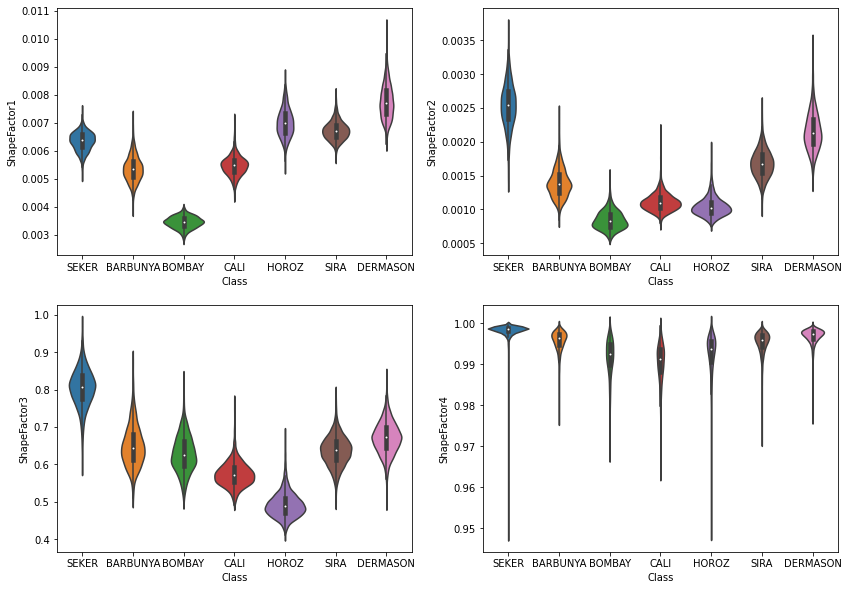

In [7]:
def violin_plot(data, columns, out_file, out_dir='../output/'):
    plt.figure(figsize=(14, 10))

    if len(columns) == 0: 
        columns = data.columns
    
    plot_cols = math.ceil(math.sqrt(len(columns)))
    plot_rows = max(1, math.ceil(len(columns)/plot_cols))

    for column_index, column in enumerate(columns):
        if column=='Class':
            continue
        plt.subplot(plot_rows, plot_cols, column_index + 1)
        sb.violinplot(x='Class', y=column, data=data)
    plt.savefig(f'{out_dir}{out_file}.png')
    
violin_plot(beans_data, ['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], 'violin_shapefactors')